C:\Users\hp\AppData\Local\Temp\ipykernel_9228\4243758403.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  netflix['date_added'] = pd.to_datetime(netflix['date_added'])
C:\Users\hp\AppData\Local\Temp\ipykernel_9228\4243758403.py:114: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=2.5, rect=[0,0,1,0.95])


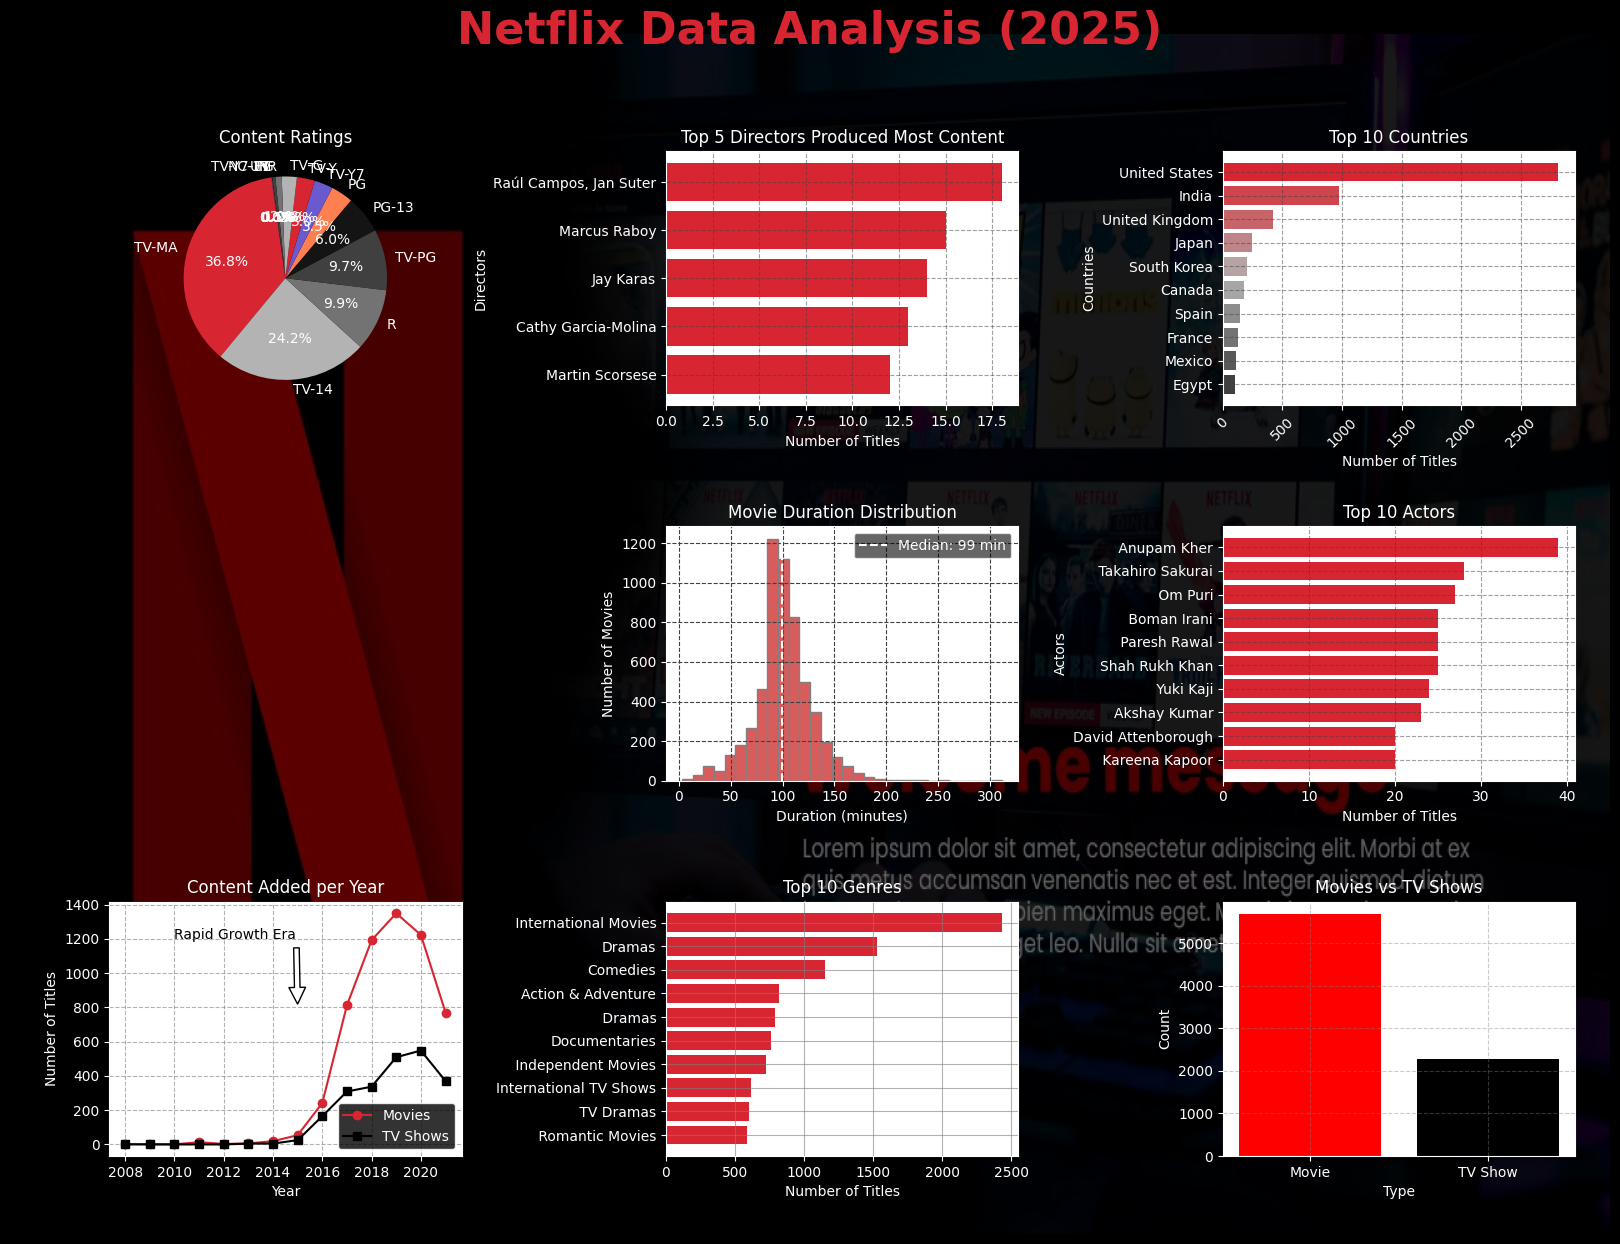

In [2]:
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt

# ---------- Styling ----------
plt.rcParams.update({
    'text.color': 'white',       
    'axes.labelcolor': 'white',    
    'xtick.color': 'white',         
    'ytick.color': 'white',         
    'axes.edgecolor': 'white',      
    'axes.facecolor': 'white',         
    'figure.facecolor': 'black',    
})

# ---------- Load Data ----------
netflix = pd.read_csv('netflix_data.csv')
netflix = netflix.dropna(subset=['type', 'release_year', 'rating', 'country', 'duration'])

# Custom colormap with cooler red
colors = ['#D72631', '#B3B3B3', '#404040']   # Deep/cool red, gray, dark gray
custom_cmap = LinearSegmentedColormap.from_list('cool_red_gray_black', colors)

# ---------- Background Image ----------
bg = mpimg.imread("netflix2.jpg")
fig, ax = plt.subplots(3, 3, figsize=(16, 12))
fig.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.05, hspace=0.6, wspace=0.4)
ax_bg = fig.add_axes([0, 0, 1, 1], zorder=-1)
ax_bg.imshow(bg, aspect='auto', alpha=0.4)
ax_bg.axis('off') 

# ---------- 1. Movies vs TV Shows (Keep same) ----------
type_counts = netflix['type'].value_counts()
ax[2,2].bar(type_counts.index, type_counts.values, color=['red','black'])
ax[2,2].set_title("Movies vs TV Shows", color='white')
ax[2,2].set_xlabel("Type", color='white')
ax[2,2].set_ylabel("Count", color='white')
ax[2,2].grid(True,color='grey', linestyle='--', alpha=0.4)

# ---------- 2. Ratings Distribution ----------
rating_count = netflix['rating'].value_counts()
rating_colors = ['#D72631', '#B3B3B3', '#737373', '#404040', '#141414', '#FF7F50', '#6A5ACD']
ax[0,0].pie(rating_count, labels=rating_count.index, autopct='%1.1f%%', startangle=98, colors=rating_colors)
ax[0,0].set_title("Content Ratings", color='white')
ax[0,0].tick_params(rotation=90)

# ---------- 3. Yearly Trend ----------
netflix['date_added'] = pd.to_datetime(netflix['date_added'])
netflix['date_year'] = netflix['date_added'].dt.year
content_trend = netflix.groupby(['date_year','type']).size().unstack(fill_value=0)
ax[2,0].plot(content_trend.index, content_trend['Movie'], label='Movies', marker='o', color='#D72631')
ax[2,0].plot(content_trend.index, content_trend['TV Show'], label='TV Shows', marker='s', color='#000000')
ax[2,0].set_title("Content Added per Year", color='white')
ax[2,0].set_xlabel("Year", color='white')
ax[2,0].set_ylabel("Number of Titles", color='white')
ax[2,0].grid(True, color='grey', linestyle='--', alpha=0.6)
ax[2,0].legend(facecolor='black', edgecolor='white', labelcolor='white')
ax[2,0].annotate('Rapid Growth Era', xy=(2015, 800), xytext=(2010, 1200),
                 arrowprops=dict(facecolor='white', shrink=0.05), color='black')

# ---------- 4. Top 10 Countries ----------
country_contribution = netflix['country'].value_counts().head(10)
bar_colors = custom_cmap(np.linspace(0, 1, len(country_contribution)))[::-1]
ax[0,2].barh(country_contribution.index[::-1], country_contribution.values[::-1], color=bar_colors)
ax[0,2].set_title("Top 10 Countries", color='white')
ax[0,2].set_xlabel("Number of Titles", color='white')
ax[0,2].set_ylabel("Countries", color='white')
ax[0,2].tick_params(axis='x', rotation=45, colors='white')
ax[0,2].grid(True, color='#404040', linestyle='--', alpha=0.5)

# ---------- 5. Top 5 Directors ----------
director_count = netflix['director'].value_counts().head(5)
ax[0,1].barh(director_count.index[::-1], director_count.values[::-1], color='#D72631')
ax[0,1].set_title("Top 5 Directors Produced Most Content", color='white')
ax[0,1].set_xlabel("Number of Titles", color='white')
ax[0,1].set_ylabel("Directors", color='white')
ax[0,1].grid(True, color='#404040', linestyle='--', alpha=0.5)

# ---------- 6. Movie Durations ----------
movie_df = netflix[netflix['type']=='Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace('min','').astype(int)
ax[1,1].hist(movie_df['duration_int'], bins=30, color="#D95C5C", edgecolor='grey')  # cooler red
ax[1,1].set_title("Movie Duration Distribution", color='white')
ax[1,1].set_xlabel("Duration (minutes)", color='white')
ax[1,1].set_ylabel("Number of Movies", color='white')
ax[1,1].grid(True, color='#404040', linestyle='--')
median_duration = movie_df['duration_int'].median()
ax[1,1].axvline(median_duration, color='white', linestyle='dashed', linewidth=1.5, label=f'Median: {int(median_duration)} min')
ax[1,1].legend(facecolor='black', edgecolor='white', labelcolor='white', framealpha=0.6)

# ---------- 7. Top 10 Actors ----------
top_actors = netflix['cast'].dropna().str.split(',').explode()
top_actors_count = top_actors.value_counts().head(10)
ax[1,2].barh(top_actors_count.index[::-1], top_actors_count.values[::-1], color="#D72631")
ax[1,2].set_title("Top 10 Actors", color='white')
ax[1,2].set_xlabel("Number of Titles", color='white')
ax[1,2].set_ylabel("Actors", color='white')
ax[1,2].grid(True, color='#404040', linestyle='--', alpha=0.5)

# ---------- 8. Top 10 Genres ----------
genre_series = netflix['listed_in'].str.split(',').explode()
top_genres = genre_series.value_counts().head(10)
ax[2,1].barh(top_genres.index[::-1], top_genres.values[::-1], color='#D72631')
ax[2,1].set_title("Top 10 Genres", color='white')
ax[2,1].set_xlabel("Number of Titles", color='white')
ax[2,1].grid(True, color='grey', alpha=0.6)

# ---------- 9. Empty subplot ----------
ax[1,0].axis('off')

# ---------- Layout and Suptitle ----------
plt.tight_layout(pad=2.5, rect=[0,0,1,0.95])
fig.suptitle('Netflix Data Analysis (2025)', fontsize=32, fontweight='bold', color='#D72631', y=1.02)

plt.show()
